In [2]:
import numpy as np
import GPy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
# Read in the train and test csv
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [4]:
# Drop nulls
train_data = train_data.dropna(axis=0, how='any')
test_data = test_data.dropna(axis=0, how='any')

In [5]:
# Extract Relativetime as Y data for training and lineary scale it
sc = StandardScaler()
y_Train = sc.fit_transform(train_data['RelativeTimeMilliseconds'].values.reshape(-1, 1))
y_Test = sc.fit_transform(test_data['RelativeTimeMilliseconds'].values.reshape(-1, 1))

In [6]:
# Extract 3 features for input to model
featCols = ['Tidal Volume', 'HR',"RR"]
X_Train = train_data.loc[:,featCols]
X_Test = test_data.loc[:,featCols]
X_Train

,Tidal Volume,HR,RR
20,11,68.0,13
21,11,68.0,13
22,11,70.0,9
23,11,70.0,9
24,11,70.0,9
...,...,...,...
3545,898,51.0,7
3546,898,51.0,7
3547,898,51.0,7
3548,898,51.0,7


In [7]:
# Scale X data
X_Train = sc.fit_transform(X_Train)
X_Test = sc.fit_transform(X_Test)

In [8]:
# Create model with 3 input dims + time
kernel = GPy.kern.RBF(3, ARD=True) 
model = GPy.models.GPRegression(X_Train, y_Train, kernel)
model.optimize(messages=True, max_f_eval = 1000)
display(model)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    21s03  0012  -1.989016e+03   1.473455e+04 
 01m15s68  0027  -2.314733e+03   2.348738e-01 
 01m37s21  0031  -2.314734e+03   4.722504e-05 
Runtime:  01m37s21
Optimization status: Converged



GP_regression.,value,constraints,priors
rbf.variance,0.9853068419595845,+ve,
rbf.lengthscale,"(3,)",+ve,
Gaussian_noise.variance,0.0030421274928786836,+ve,


In [9]:
pred = model.predict(X_Train, include_likelihood=False)
print(pred)
pred = model.predict(X_Train, include_likelihood=True)
print(pred)

(array([[-1.72678449],
       [-1.72678449],
       [-1.72506719],
       ...,
       [ 1.71949884],
       [ 1.71949884],
       [ 1.7176044 ]]), array([[0.00151872],
       [0.00151872],
       [0.001013  ],
       ...,
       [0.00060805],
       [0.00060805],
       [0.00303277]]))
(array([[-1.72678449],
       [-1.72678449],
       [-1.72506719],
       ...,
       [ 1.71949884],
       [ 1.71949884],
       [ 1.7176044 ]]), array([[0.00456085],
       [0.00456085],
       [0.00405513],
       ...,
       [0.00365018],
       [0.00365018],
       [0.0060749 ]]))


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f56a1e76e50>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f56a1e86310>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f56a1e865e0>]}

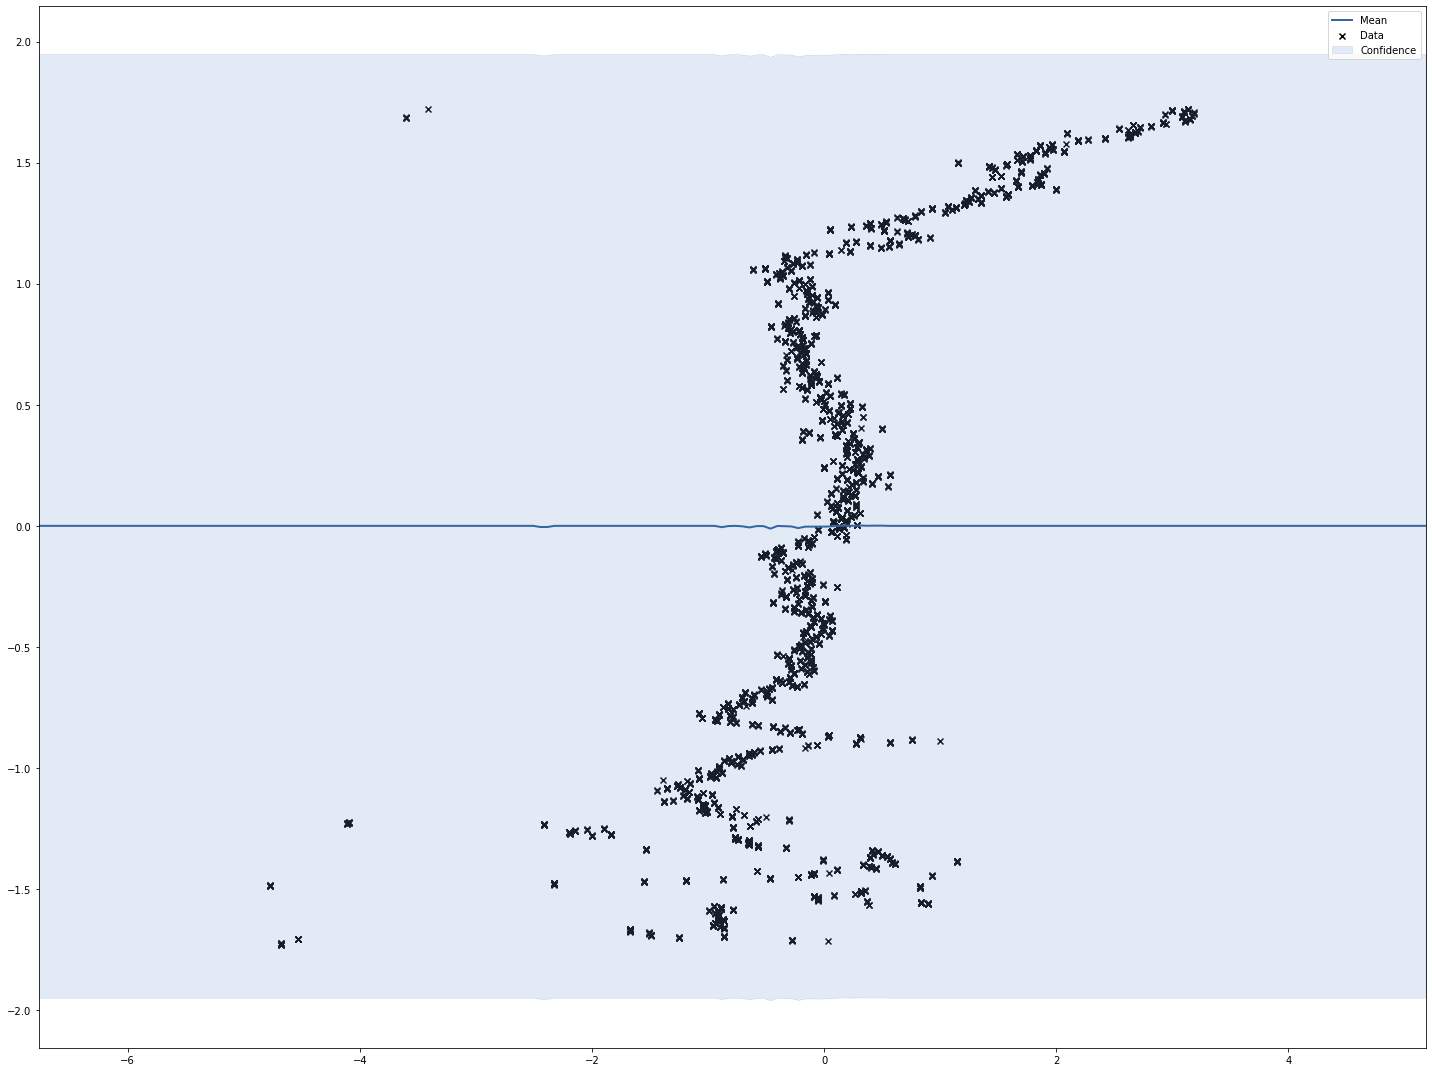

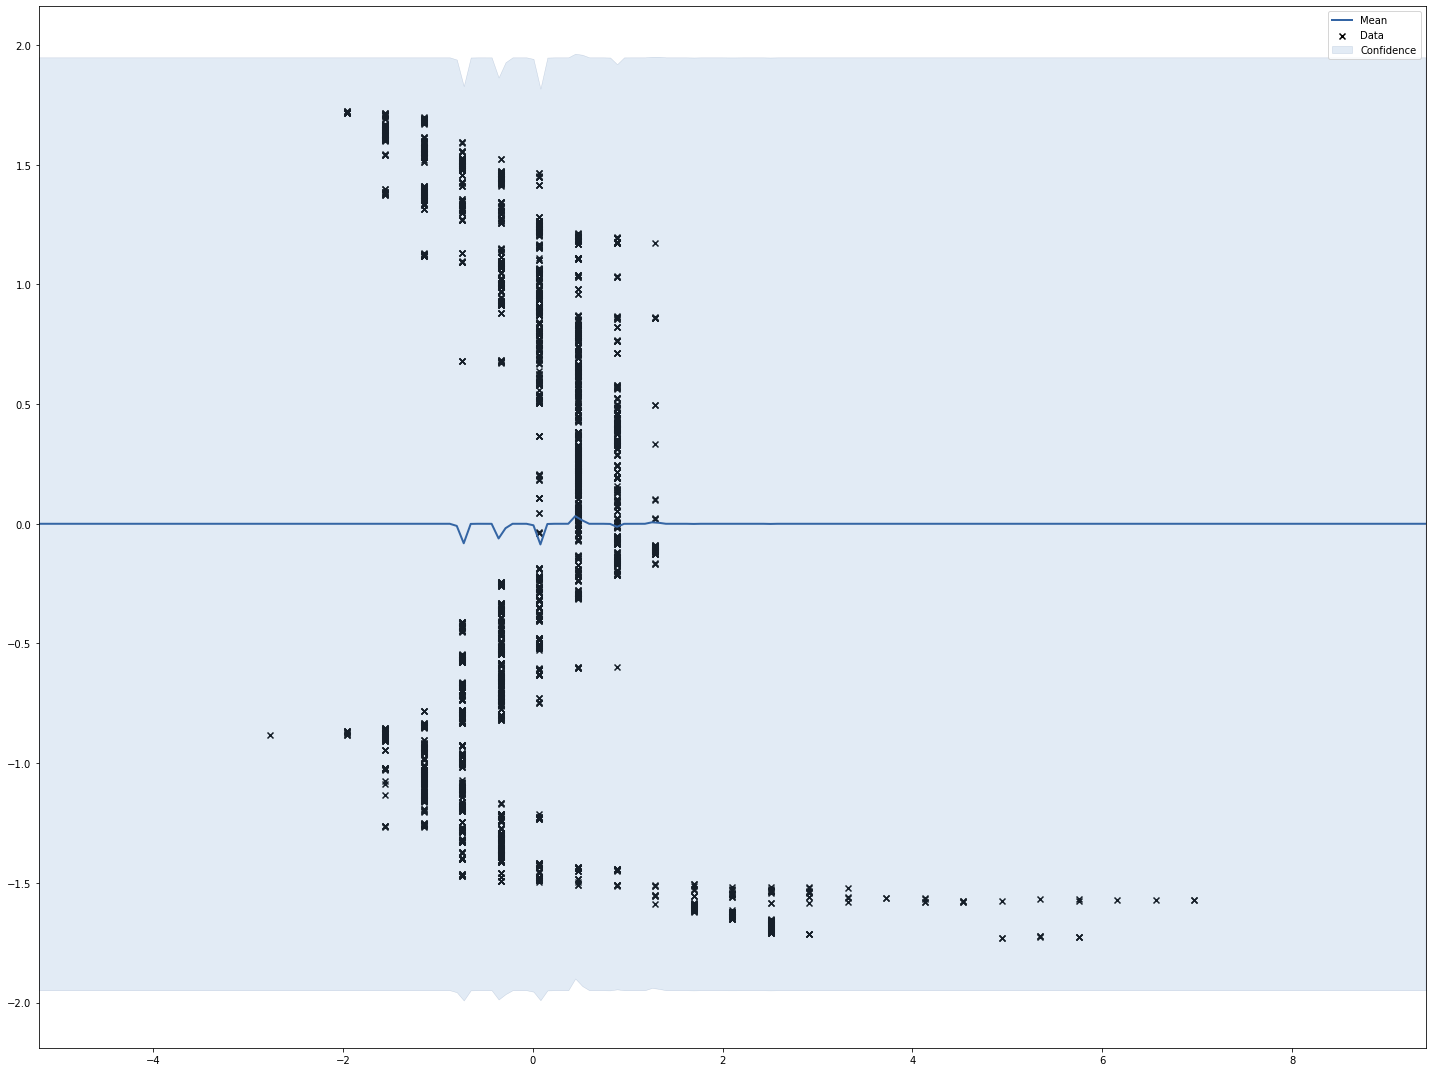

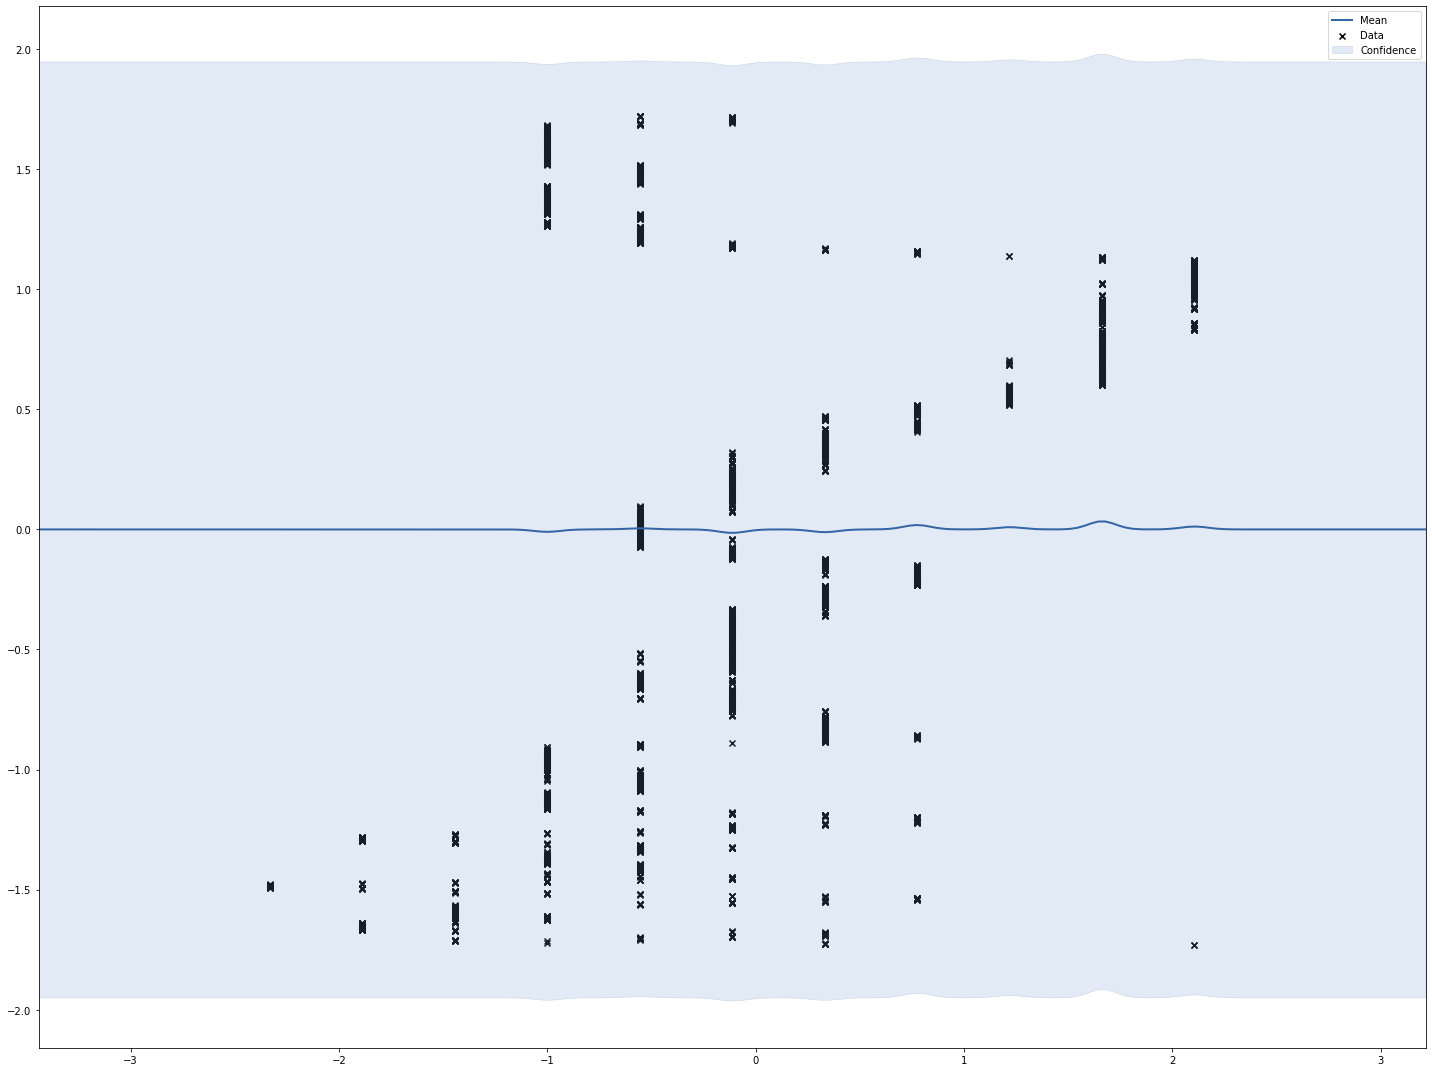

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

model.plot(visible_dims = [0])
model.plot(visible_dims = [1])
model.plot(visible_dims = [2])

 /home/fabs/code/astraVenv/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f56a01dba00>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f56a01ceac0>]}

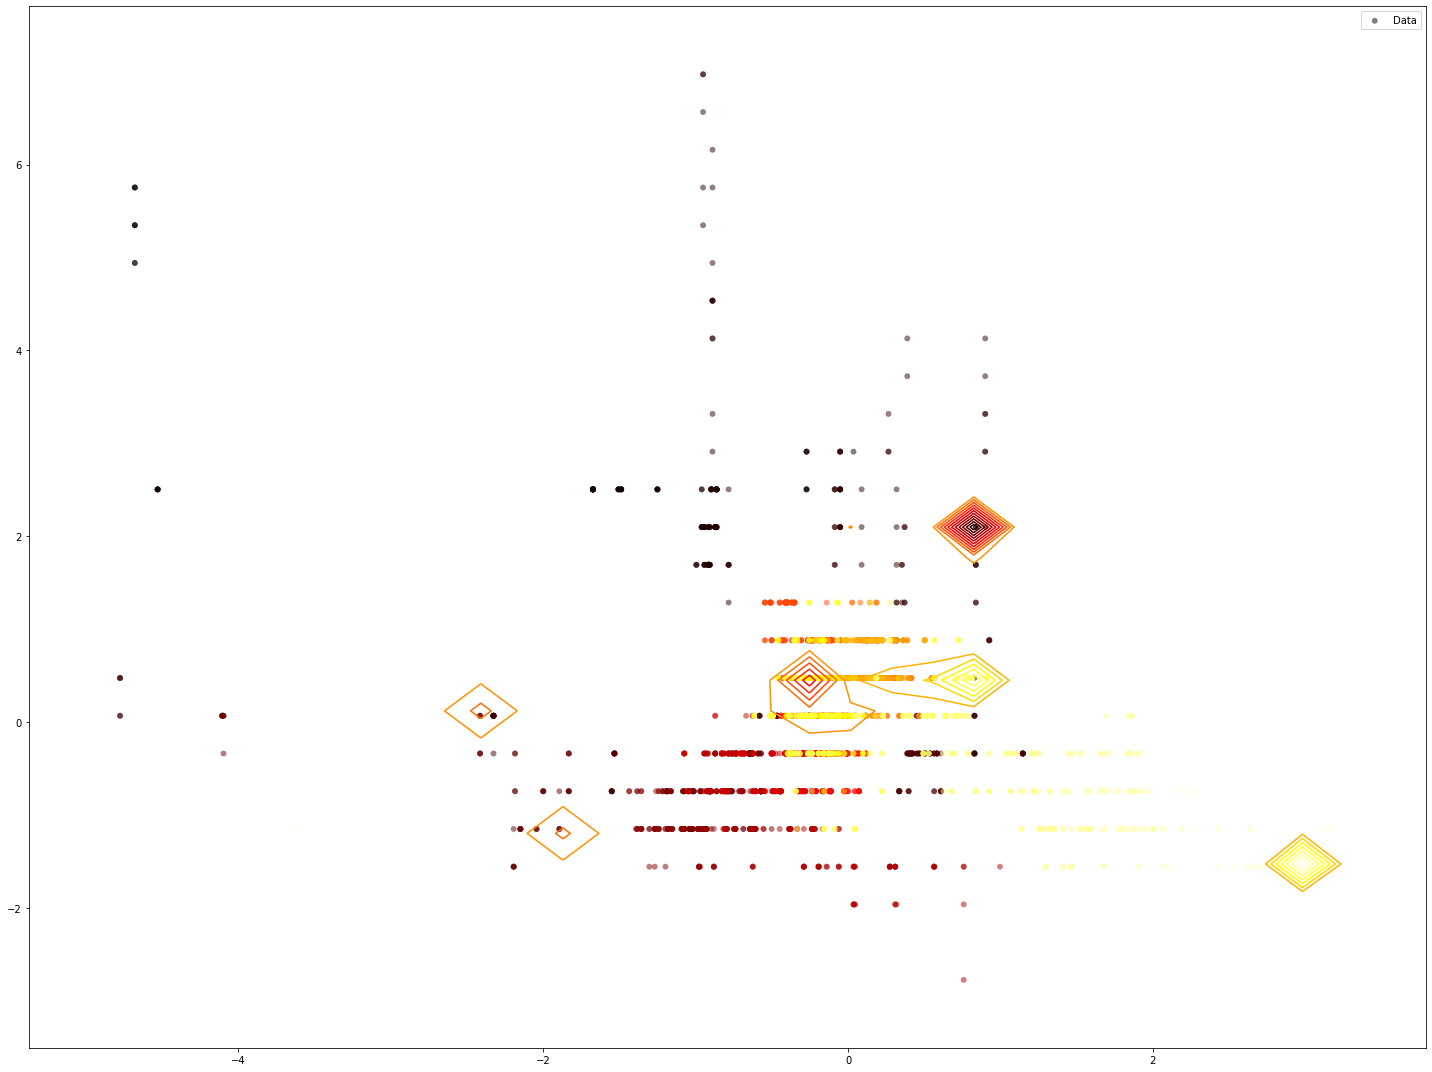

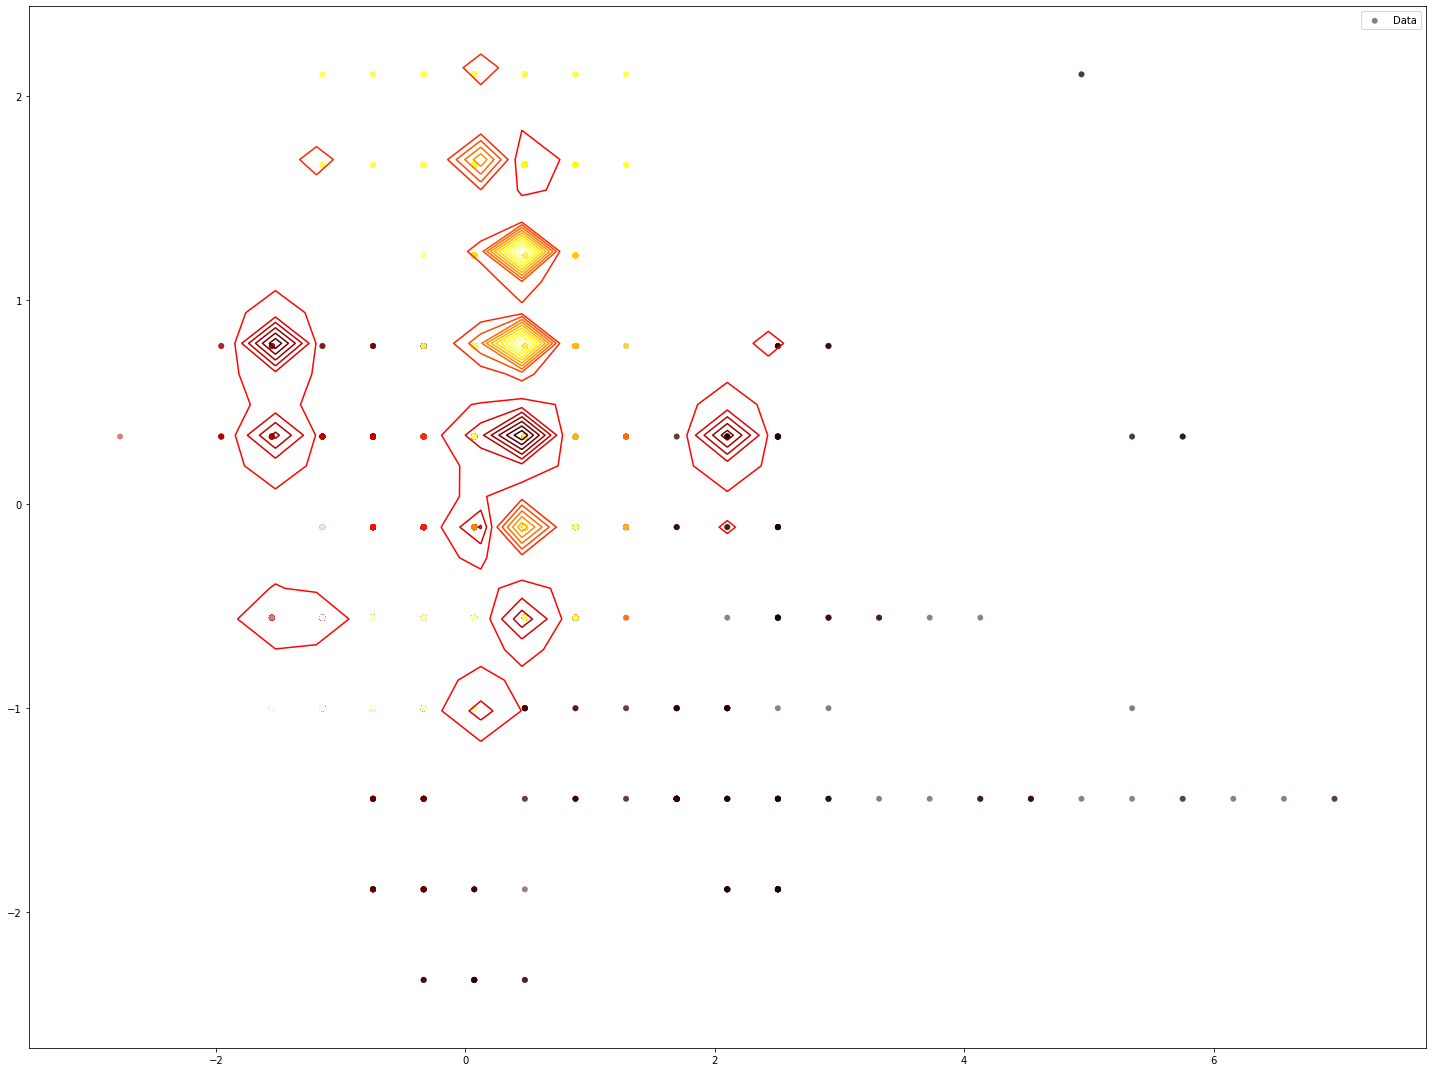

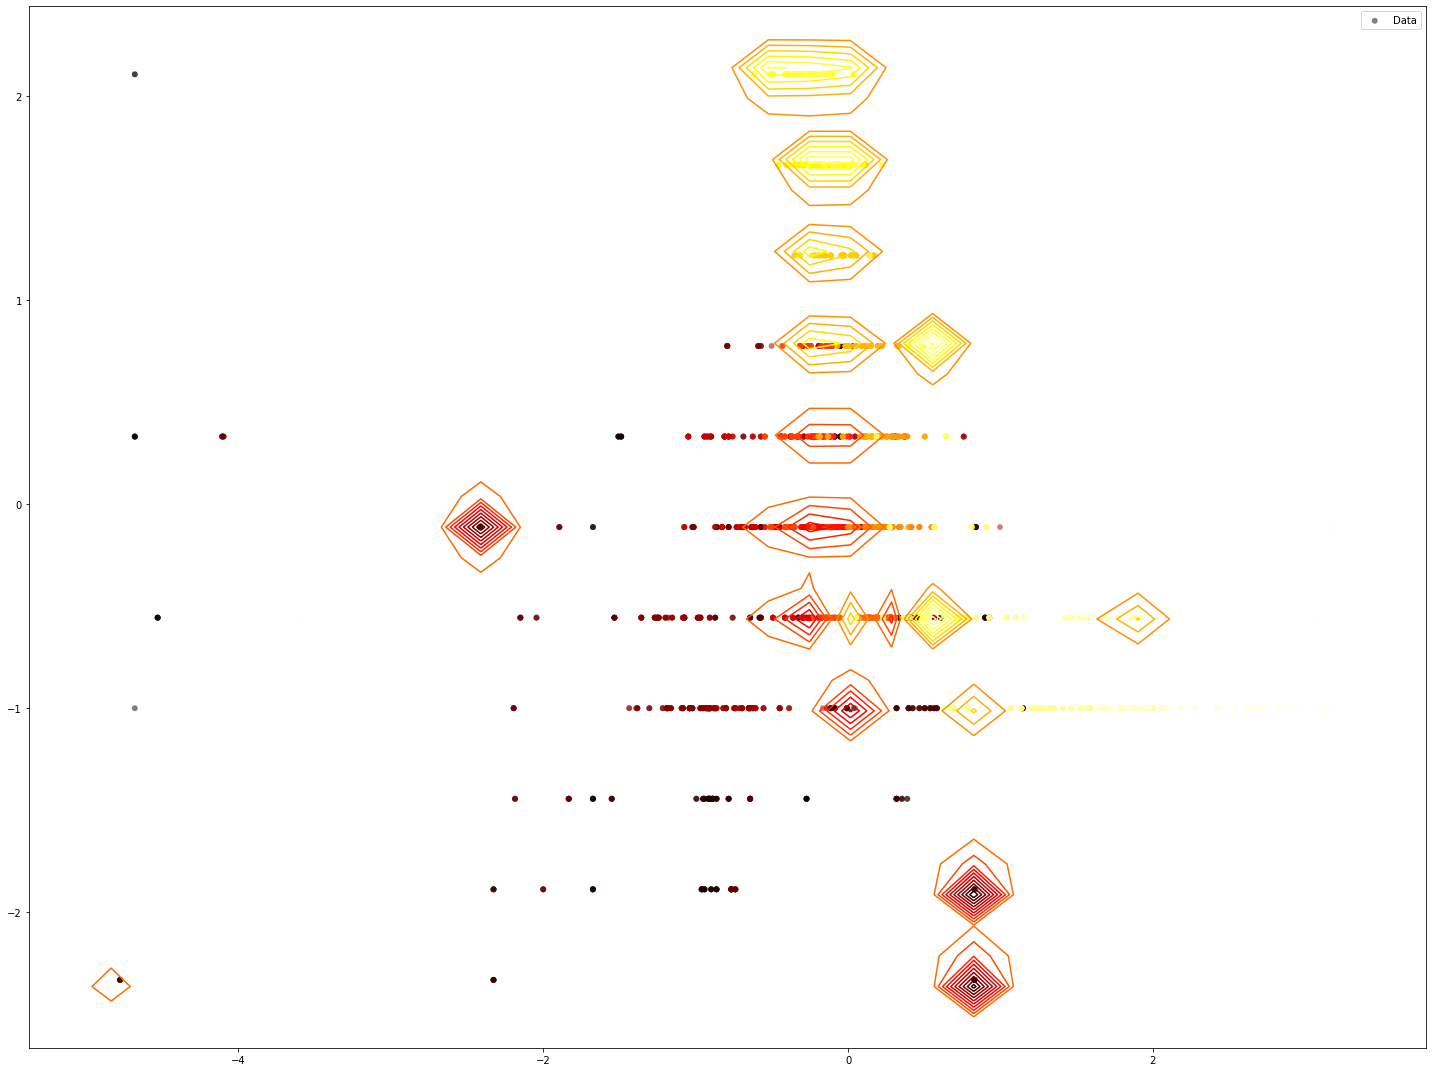

In [11]:
model.plot(visible_dims = [0,1])
model.plot(visible_dims = [1,2])
model.plot(visible_dims = [0,2])

# 1 x   -----------------    Multiple Ys

In [12]:
kernel1X = GPy.kern.RBF(input_dim =1, ARD=True) 
model1X = GPy.models.GPRegression(y_Train, X_Train, kernel1X)
model1X.optimize(messages=True, max_f_eval = 1000)
display(model1X)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   1.109957e+04           nan 
    09s67  0005   1.042268e+04   8.837543e+07 
    32s83  0016   2.586877e+04   2.020094e+09 
    47s44  0022  -9.522676e+02   5.412655e+04 
 01m07s39  0030  -9.650937e+02   1.732909e-06 
 01m34s29  0041  -9.650937e+02   1.732909e-06 
Runtime:  01m34s29
Optimization status: Converged



GP_regression.,value,constraints,priors
rbf.variance,0.696339196628146,+ve,
rbf.lengthscale,0.004377281789424255,+ve,
Gaussian_noise.variance,0.016806760809738877,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f56a00d26a0>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f56a00d54c0>,
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f56a00d5ee0>,
  <matplotlib.collections.PolyCollection at 0x7f56a00dd3d0>]}

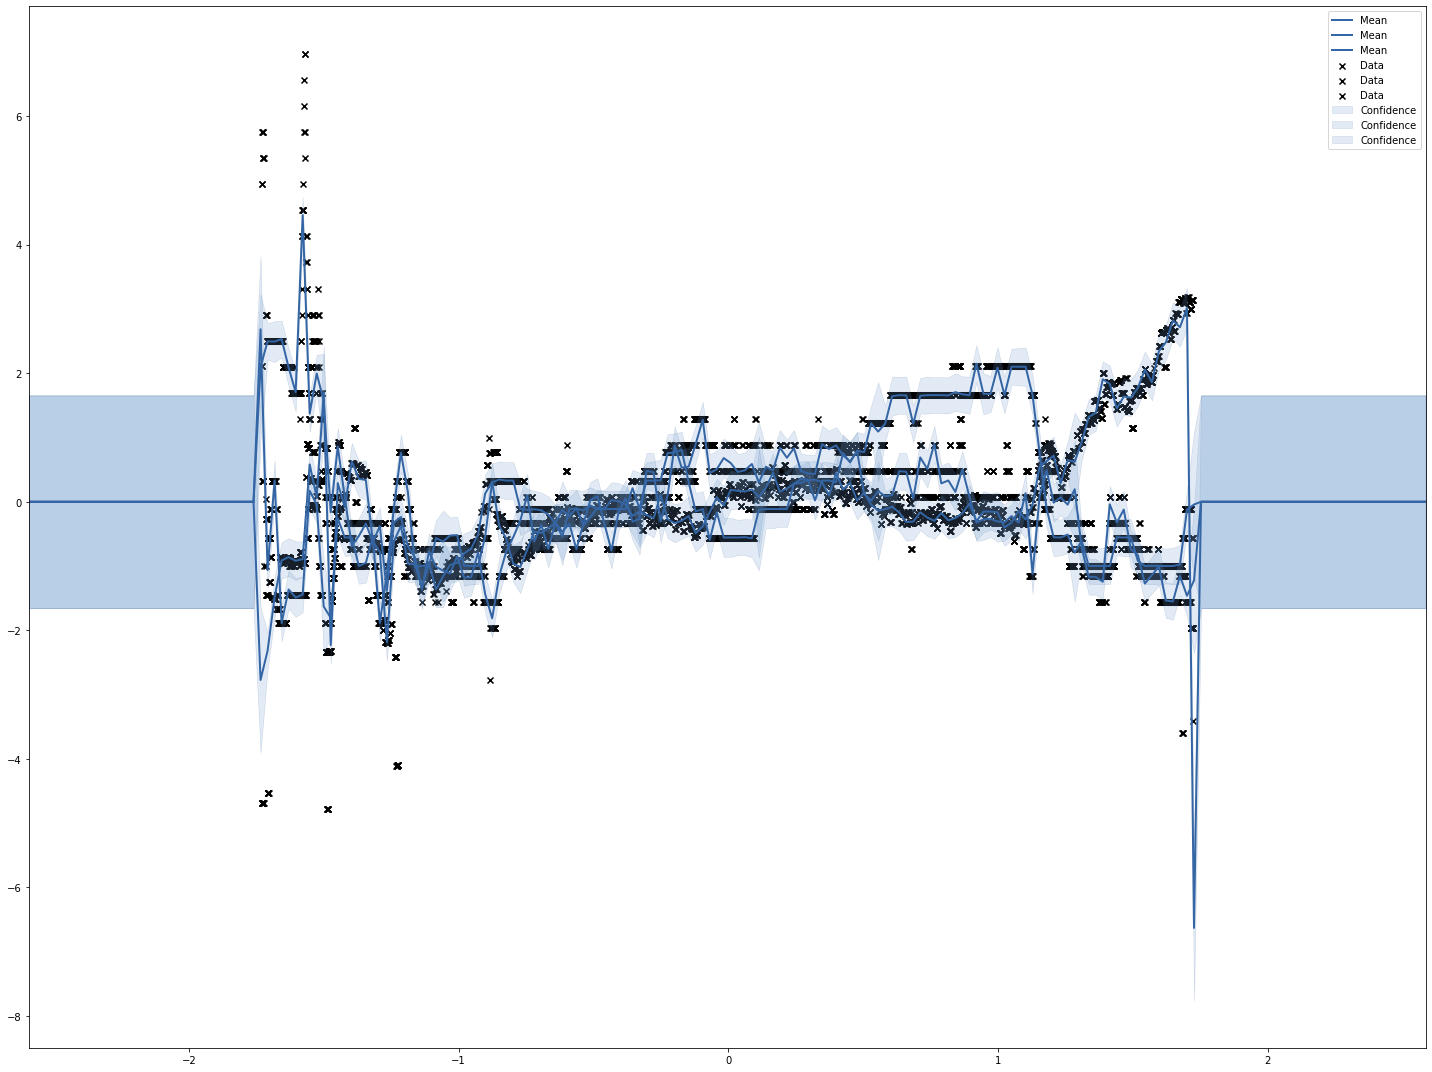

In [13]:
model1X.plot()

# No time just X vitalsign and Y vitalsign

In [14]:
# Extract 2 features for input to model
featColsX = ['HR']
X_Train2 = train_data.loc[:,featColsX]
X_Test2 = test_data.loc[:,featColsX]
featColsY = ['RR']
y_Train2 = train_data.loc[:,featColsY]
y_Test2 = test_data.loc[:,featColsY]

# Scale X data
X_Train2 = sc.fit_transform(X_Train2)
X_Test2 = sc.fit_transform(X_Test2)

y_Train2 = sc.fit_transform(y_Train2)
y_Test2 = sc.fit_transform(y_Test2)

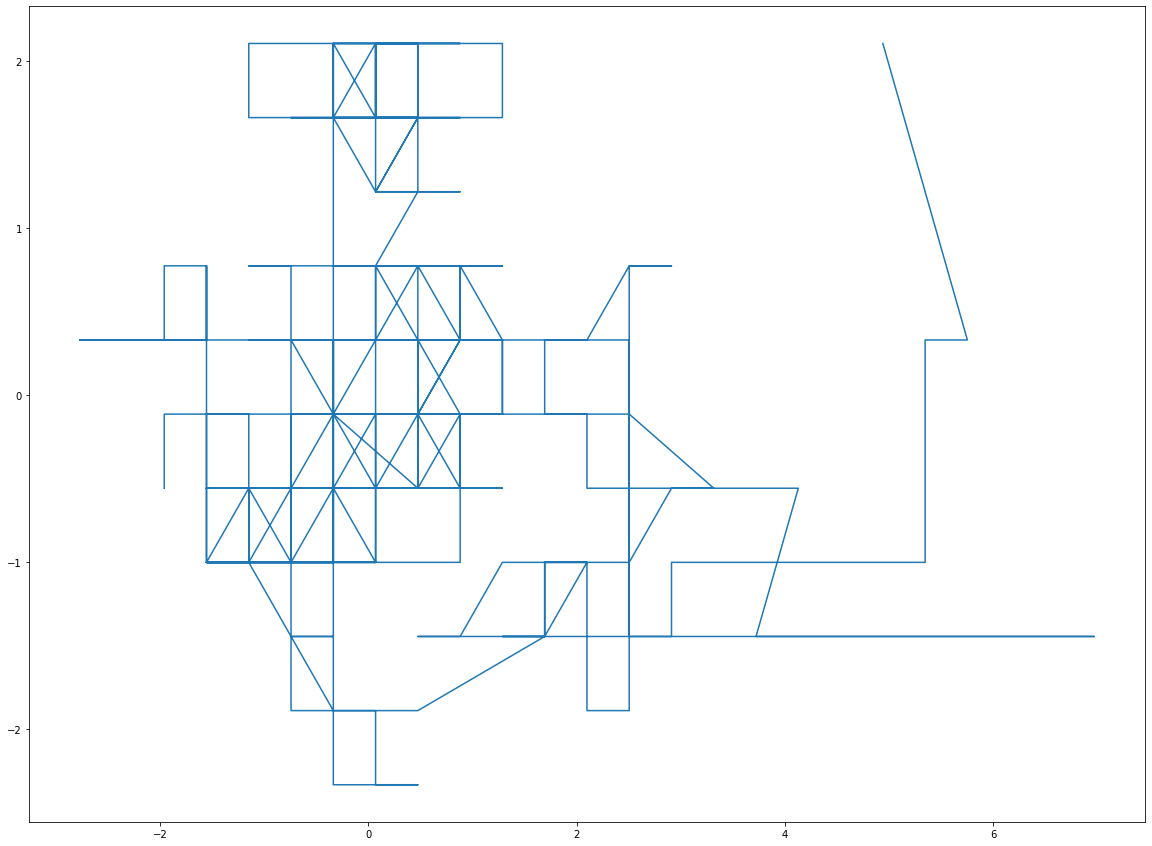

In [15]:
plt.plot(X_Train2, y_Train2)

In [16]:
#kernelXY = GPy.kern.RBF(1, ARD=True) 
#modelXY = GPy.models.GPRegression(X_Train2, y_Train2, kernelXY)
#modelXY.optimize(messages=True, max_f_eval = 1000)
#display(modelXY)

In [17]:
#modelXY.plot()

In [30]:
X_Train

array([[-4.67809628,  4.94092083,  2.10592601],
       [-4.67809628,  4.94092083,  2.10592601],
       [-4.67809628,  5.75266504,  0.33079578],
       ...,
       [ 3.13822903, -1.95890499, -0.55676933],
       [ 3.13822903, -1.95890499, -0.55676933],
       [-3.40915508, -1.95890499, -0.55676933]])

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpr = GaussianProcessRegressor(kernel= kernel,random_state=0).fit(y_Train, X_Train)


 /home/fabs/code/astraVenv/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning:The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.


In [32]:
print("Training data score:")
print(gpr.score(y_Train, X_Train))
print("Test data score:")
print(gpr.score(y_Test, X_Test))

print("predict train")
print(gpr.predict(y_Train))
print("predict test")
print(gpr.predict(y_Test))


Training data score:
1.0
Test data score:
0.026283428700843953
predict train
[[-4.67809628  4.94092083  2.10592601]
 [-4.67809628  4.94092083  2.10592601]
 [-4.67809628  5.75266504  0.33079578]
 ...
 [ 3.13822902 -1.95890499 -0.55676933]
 [ 3.13822902 -1.95890499 -0.55676933]
 [-3.40915508 -1.95890499 -0.55676933]]
predict test
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
